# Computer Assignment 4 Report
<h3>
Artificial Intelligence Course - University of Tehran - Fall 1400<br>
Machine Learning<br>
Name: Kianoush Arshi<br>
Student ID: 810198438
</h3>
<h4>
In this assignment, we'll be using two machine learning models to predict the type of films in a dataset of films at Netflix and Amazon.<br>
The first model is a decision-tree based model.<br>
The second one is a model based on ensemble learning.<br>
This project includes 4 phases:<br>
    <li>Data Analysis
    <li>Pre-Processing
    <li>Predictions and Optimization
    <li>Prediction Using Ensemble Learning
</h4>

In [1]:
import pandas as pd
import sklearn as sk

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df

,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,NaN,United States,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,1996,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


In [4]:
df.describe()

,release_year
count,11059.000000
mean,2014.209603
std,8.959517
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          11059 non-null  object
 1   title         11059 non-null  object
 2   cast          9694 non-null   object
 3   country       8364 non-null   object
 4   release_year  11059 non-null  int64 
 5   listed_in     11059 non-null  object
 6   description   11059 non-null  object
dtypes: int64(1), object(6)
memory usage: 604.9+ KB


The two columns 'cast' and 'country' have some null values, these should be handled first and then we can proceed with the processing and predictions.<br>
The missing values percentage for these two columns can be seen below:

In [6]:
for column in df.columns:
    print(column, ":", df[column].isnull().sum() * 100 / len(df[column]), "%")


type : 0.0 %
title : 0.0 %
cast : 12.342888145401934 %
country : 24.36929197938331 %
release_year : 0.0 %
listed_in : 0.0 %
description : 0.0 %


To remove NAN values from the dataframe, the most frequent value of each column is registered as the replaced value.<br>
The first method is the third one based on [1]: Imputation Using (Most Frequent) or (Zero/Constant) Values:<br>
This method is used for categorical features. but it doesn’t factor the correlations between features.
And it can introduce bias in the data.
Another possible method is Imputation Using (Mean/Median) Values which is used for numerical values.

In [7]:
nan_cols = ["cast","country"]
print(df[nan_cols].mode())
df[nan_cols]=df[nan_cols].fillna(df.mode().iloc[0])
df

                 cast        country
0  David Attenborough  United States


,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,David Attenborough,United States,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,David Attenborough,United States,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,1996,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


Based on [2]:<br>
"Normalization typically means rescales the values into a range of [0,1]. Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance)."

<b>Working With Numerical Values</b><br>
The only numerical value in the dataset is the release_year. Scaling wouldn't be the proper approach since release year is actually a categorical value and scaling would result in erroneous outputs.<br>

But by using normalization we'll have the following results:

In [8]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

normalize(pd.DataFrame(df['release_year']))

,release_year
0,0.989583
1,1.000000
2,1.000000
3,1.000000
4,1.000000
...,...
11054,0.781250
11055,0.739583
11056,0.927083
11057,0.947917


<b>Working With Categorical Values</b><br>
There are several methods to convert categorical data into numerical data [3]. Here we use 2 of them:

<li><b>Label Encoding</b>: Assigining numbers to each categorical value.
    
    
<li><b>One Hot Encoding</b>: Adding new columns for each categorical value and assigining a binary vector to each row.

Label Encoding isn't a good approach when we have no particular ordering in our categories.<br>
Realease year could be encoded using label encoding, but there's probably no need for that.<br>
In these cases, we can use One Hot Encoding which takes a lot of memory since it is adding a new column for each new category.

In [9]:
from sklearn.preprocessing import *

le = LabelEncoder()
country_encoded = le.fit_transform(df['country'])
print(country_encoded)


[608 430 608 ... 608  59 608]


One hot encoding converts integer encoding into binary variable. Each bit represent a category. If the variable cannot belong to multiple categories at once, then only one bit in the group can be “on”. This is called one-hot encoding.<br>
Before applying one hot encoding, the categorical variable is converted into numeric value using label encoder and the one hot encoding is implemented to this numeric variable.<br>
This encoding is a better approach since label encoding is usually used for ordinal data while one-hot encoding is used for nominal.

In [10]:
cat_encoded = le.fit_transform(df['country'])
cat_encoded = cat_encoded.reshape(len(cat_encoded), -1)
one = OneHotEncoder(sparse=False)

print(one.fit_transform(cat_encoded)[0]) # The final encoding of the first country (US)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [11]:
pd.options.mode.chained_assignment = None  # default='warn'

cat_cols = list(df.columns)
cat_cols.remove("description")
cat_cols.remove("title")
cat_cols.remove("cast")
cat_cols.remove("listed_in")
cat_cols.remove("country") # Countries are also list valued data

print(cat_cols)

oe = OrdinalEncoder()

new_df = df.copy()

new_df[cat_cols] = oe.fit_transform(df[cat_cols].astype(str))
new_df[cat_cols] = new_df[cat_cols].astype(int)
new_df

['type', 'release_year']


,type,title,cast,country,release_year,listed_in,description
0,0,Dick Johnson Is Dead,David Attenborough,United States,74,Documentaries,"As her father nears the end of his life, filmm..."
1,1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,75,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,1,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,75,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,1,Jailbirds New Orleans,David Attenborough,United States,75,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,1,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,75,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
11054,1,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,54,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,1,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,50,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,1,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,68,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,1,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,70,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


In [12]:
# We can also revert back to unencoded dataset using inverse_transform
new_df[cat_cols]= oe.inverse_transform(new_df[cat_cols])
new_df

,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,David Attenborough,United States,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,David Attenborough,United States,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,1996,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


In [13]:
new_df[cat_cols] = oe.fit_transform(df[cat_cols].astype(str))
new_df[cat_cols] = new_df[cat_cols].astype(int)

<h4>Dealing with list values in the dataset</h4>
In order to encode categorical values of series types in the dataset, the following approach is implemented:[4]<br>
<li>Transform the column to a list
<li>Transform columns to indexes
<li>Convert to dummy variables
<li>Sum on the index level
<li>Re-join result with the original data

In [14]:
import re

all_genres = [str.split(',') for str in new_df['listed_in'].tolist()]
all_countries = [str.split(',') for str in new_df['country'].tolist()]

The final approach taken for encoding the listed_in genre, is to add a column for each genre to the dataframe and value it as boolean false for not having that genre in listed_in and true for having it.

In [15]:
genre_set = set()
country_set = set()

for genres in all_genres:
    [genre_set.add(genre.replace(' ', '')) for genre in genres]
    
for countries in all_countries:
    [country_set.add(country.replace(' ', '')) for country in countries]
    
genre_set

{'Action',
 'Action&Adventure',
 'Action-Adventure',
 'Adventure',
 'Animals&Nature',
 'Animation',
 'Anime',
 'AnimeFeatures',
 'AnimeSeries',
 'Anthology',
 'Arthouse',
 'Arts',
 'BritishTVShows',
 'Buddy',
 'Children&FamilyMovies',
 'Classic&CultTV',
 'ClassicMovies',
 'Comedies',
 'Comedy',
 'ComingofAge',
 'CrimeTVShows',
 'CultMovies',
 'Documentaries',
 'Documentary',
 'Docuseries',
 'Drama',
 'Dramas',
 'Entertainment',
 'Faith&Spirituality',
 'FaithandSpirituality',
 'Family',
 'Fantasy',
 'Fitness',
 'GameShow/Competition',
 'Historical',
 'Horror',
 'HorrorMovies',
 'IndependentMovies',
 'International',
 'InternationalMovies',
 'InternationalTVShows',
 'Kids',
 "Kids'TV",
 'KoreanTVShows',
 'LGBTQ',
 'LGBTQMovies',
 'Lifestyle',
 'Medical',
 'MilitaryandWar',
 'Movies',
 'Music',
 'Music&Musicals',
 'MusicVideosandConcerts',
 'Musical',
 'Mystery',
 'Parody',
 'Police/Cop',
 'Reality',
 'RealityTV',
 'Romance',
 'RomanticMovies',
 'RomanticTVShows',
 'Sci-Fi&Fantasy',
 'Sci

In [16]:
country_set.remove('')
country_set

{'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bermuda',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'BurkinaFaso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'CaymanIslands',
 'Chile',
 'China',
 'Colombia',
 'Croatia',
 'Cuba',
 'Cyprus',
 'CzechRepublic',
 'Denmark',
 'DominicanRepublic',
 'EastGermany',
 'Ecuador',
 'Egypt',
 'Ethiopia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'HongKong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malawi',
 'Malaysia',
 'Malta',
 'Mauritius',
 'Mexico',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Netherlands',
 'NewZealand',
 'Nicaragua',
 'Nigeria',
 'Norway',
 'Paki

In [17]:
def g_in_l(x, genre):
    for str in x.split(','):
        if genre == str.replace(' ', ''):
            return True
    return False

genre_df = pd.DataFrame(index=new_df.index)
country_df = pd.DataFrame(index=new_df.index)

for genre in list(genre_set):
    genre_df[genre] = new_df['listed_in'].apply(lambda x: g_in_l(x, genre))
    
for country in list(country_set):
    country_df[country] = new_df['country'].apply(lambda x: country in x.split(','))

new_df = pd.concat([new_df, genre_df, country_df], axis = 1).drop_duplicates()
new_df

C:\Users\WIN10\AppData\Local\Temp/ipykernel_16460/456416080.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  country_df[country] = new_df['country'].apply(lambda x: country in x.split(','))


,type,title,cast,country,release_year,listed_in,description,TVMysteries,ScienceFiction,SoapOpera/Melodrama,...,Romania,Liechtenstein,Slovakia,Vietnam,EastGermany,Ireland,SouthAfrica,Malawi,Malaysia,Bangladesh
0,0,Dick Johnson Is Dead,David Attenborough,United States,74,Documentaries,"As her father nears the end of his life, filmm...",False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,75,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,75,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,Jailbirds New Orleans,David Attenborough,United States,75,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,75,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,1,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,54,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11055,1,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,50,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11056,1,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,68,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11057,1,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,70,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...,False,True,False,...,False,False,False,False,False,False,False,False,False,False


Now, we added 95 new columns/features to the dataframe.<br>


<h3>Words Extraction:</h3>
In this part, the most occuring words are extracted from text valued columns. The text-valued columns are:
<li> title
<li> description
<li> cast
    
These words will be added to the dataframe as columns.

In [18]:
from collections import Counter

words_count = Counter()

for sentence in new_df['description']:
    words = sentence.split(' ')
    for word in words:
        words_count[word] = words_count.get(word, 0) + 1
        
most_common_words = words_count.most_common(50)
for word in most_common_words[:50]:
    print(word)

('the', 12403)
('a', 12390)
('and', 9487)
('to', 8560)
('of', 7967)
('in', 5071)
('his', 3936)
('with', 2976)
('her', 2500)
('for', 2343)
('on', 2248)
('their', 2230)
('an', 2121)
('is', 2111)
('A', 1679)
('as', 1644)
('from', 1617)
('by', 1339)
('that', 1326)
('this', 1231)
('who', 1159)
('he', 1105)
('into', 952)
('The', 929)
('at', 928)
('they', 892)
('when', 882)
('In', 877)
('new', 836)
('When', 818)
('young', 793)
('are', 786)
('life', 776)
('up', 748)
('but', 740)
('–', 666)
('she', 654)
('After', 629)
('This', 593)
('series', 564)
('family', 563)
('out', 544)
('one', 517)
('about', 514)
('be', 500)
('after', 496)
('man', 496)
('has', 492)
('two', 489)
('friends', 479)


As can be seen above, some words are too common. These are called stop words which will not be helpful in distinguishing between the two film types. So we'll remove them and try again:

In [19]:
with open('stop_words.txt', encoding="utf8") as f:
    ignore = [line.rstrip() for line in f]

ignore = [x.strip() for x in ignore]
ignore.append('—')
ignore.append('–')

In [20]:
words_count.clear()

def get_most_common_in(column : str):
    for sentence in new_df[column]:
        words = sentence.split(' ')
        for word in words:
            if word.lower() not in ignore:
                words_count[word] = words_count.get(word, 0) + 1

    most_common_words = words_count.most_common(50)
    for word in most_common_words[:30]:
        print(word)
        
get_most_common_in('description')

('life', 776)
('series', 564)
('family', 563)
('friends', 479)
('woman', 449)
('love', 449)
('takes', 368)
('documentary', 339)
('lives', 295)
('story', 268)
('save', 262)
('team', 261)
('school', 260)
('girl', 244)
('stories', 233)
('mysterious', 221)
('time', 215)
('true', 209)
('teen', 202)
('father', 184)
('journey', 184)
('learn', 183)
('comedy', 182)
('fight', 180)
('returns', 178)
('falls', 169)
('people', 169)
('son', 168)
('boy', 165)
('secret', 164)


Above is a list of the 30 most common words in the description column of our dataset.<br>
Now, we'll use another method: Count Vectorizer[6]
<h4>Count Vectorizer</h4>

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import (CountVectorizer, 
                                             TfidfVectorizer,
                                             TfidfTransformer)

In [22]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1))
vectorized = vectorizer.fit_transform(new_df['description'])
pd.DataFrame(vectorized.toarray(), 
            index=['sentence '+str(i) 
                   for i in range(1, 1+len(new_df['description']))],
            columns=vectorizer.get_feature_names_out())

,000,007,009,10,100,1000,100k,101,102,104th,...,ángel,émile,éxito,ólafsson,ömer,über,łukasz,ōarai,şeref,ｇｅｔ
sentence 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 11055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 11056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 11057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 11058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Too many columns are generated! Let's try and make it a little smaller by adding a min_df condition which indicates the minimum occurance of the word.<br>
Let's add a pattern so that numerical values aren't included.

In [23]:
vectorizer = CountVectorizer(analyzer='word',
                             token_pattern=r'\b[a-zA-Z]{3,}\b',  # At least 3 letters for the word
                             ngram_range=(1, 1),
                             min_df = 150, # minimum of 150 occurances
                             stop_words='english' # Use English stop words
                             )  
vectorized = vectorizer.fit_transform(new_df['description']+' '+new_df['title'])
td_df = pd.DataFrame(vectorized.toarray(), 
             index=[i for i in range(len(new_df['description']))],
             columns=vectorizer.get_feature_names_out())

cast_vectorizer = CountVectorizer(analyzer='word',
                             token_pattern=r'\b[a-zA-Z]{3,} [a-zA-Z]{3,}\b',  # At least 3 letters for the word
                             ngram_range=(1, 1),
                             min_df = 20, # minimum of 20 occurances
                             stop_words='english' # Use English stop words
                             )  
cast_vectorized = cast_vectorizer.fit_transform(new_df['cast'])
c_df = pd.DataFrame(cast_vectorized.toarray(), 
             index=[i for i in range(len(new_df['cast']))],
             columns=cast_vectorizer.get_feature_names_out())
vec_df = pd.concat([td_df, c_df], axis = 1)
vec_df

,adventure,adventures,america,american,based,battle,begins,best,big,boy,...,rupa bhimani,salman khan,sam vincent,shah rukh,takahiro sakurai,tara strong,tom kenny,vincent tong,yuichi nakamura,yuki kaji
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df = pd.concat([new_df, vec_df], axis = 1)
df

,type,title,cast,country,release_year,listed_in,description,TVMysteries,ScienceFiction,SoapOpera/Melodrama,...,rupa bhimani,salman khan,sam vincent,shah rukh,takahiro sakurai,tara strong,tom kenny,vincent tong,yuichi nakamura,yuki kaji
0,0,Dick Johnson Is Dead,David Attenborough,United States,74,Documentaries,"As her father nears the end of his life, filmm...",False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,75,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",True,False,False,...,0,0,0,0,0,0,0,0,0,0
2,1,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,75,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,1,Jailbirds New Orleans,David Attenborough,United States,75,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,1,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,75,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,1,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,54,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...,False,False,False,...,0,0,0,0,0,0,0,0,0,0
11055,1,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,50,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...,False,False,False,...,0,0,0,0,0,0,0,0,0,0
11056,1,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,68,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.,False,False,False,...,0,0,0,0,0,0,0,0,0,0
11057,1,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,70,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...,False,True,False,...,0,0,0,0,0,0,0,0,0,0


<h4>TF-IDF [6]</h4>
We can further transform a count matrix to a normalized tf: term-frequency or tf-idf: term-frequency times inverse document-frequency representation using TfidfTransformer. The formula that is used to compute the tf-idf for a term t of a document d in a document set is:
$$\text{tf-idf}(t,d) = \text{tf}(t,d)*log(\frac{n}{df(t)+1})$$
Where <br>
<li>tf(t, d) is the number of times a term occurs in the given document. This is same with what we got from the CountVectorizer
<li>n is the total number of documents in the document set
<li>df(t) is the number of documents in the document set that contain the term t
    
So, basically in this method, the occurances of words have some effect on their respective values in the matrix.
In this method, we don't need to manually remove stop words.


In [25]:
tf_vectorizer = TfidfVectorizer(analyzer='word', 
                              token_pattern=r'\b[a-zA-Z]{3,}\b',
                              ngram_range=(1, 1),
                              min_df = 150,
                              stop_words='english'
                              )  
tf_vectorized = tf_vectorizer.fit_transform(new_df['description']+' '+new_df['title'])
pd.DataFrame(tf_vectorized.toarray(), 
             index=['title+description '+str(i) 
                    for i in range(1, 1+len(new_df['description']))],
             columns=tf_vectorizer.get_feature_names_out())

,adventure,adventures,america,american,based,battle,begins,best,big,boy,...,way,wife,wild,woman,women,work,world,year,years,young
title+description 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0
title+description 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0
title+description 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0
title+description 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.537593,0.0,0.00000,0.0,0.0,0.0
title+description 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
title+description 11055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.26501,0.0,0.0,0.0
title+description 11056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0
title+description 11057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,1.00000,0.0,0.0,0.0
title+description 11058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0


<h4>Effects of vectorizing on learning:</h4>
//TODO

<br>

<h4>Information gain [8]</h4>
After vectorizing the rest of the text-valued columns, we should find the features with highest information gain for our film type column.<br>

Information Gain, measures the reduction in entropy or surprise by splitting a dataset according to a given value of a random variable.<br>

A larger information gain suggests a lower entropy group or groups of samples, and hence less surprise.<br>

You might recall that information quantifies how surprising an event is in bits. Lower probability events have more information, higher probability events have less information. Entropy quantifies how much information there is in a random variable, or more specifically its probability distribution. A skewed distribution has a low entropy, whereas a distribution where events have equal probability has a larger entropy.<br>

In information theory, we like to describe the “surprise” of an event. Low probability events are more surprising therefore have a larger amount of information. Whereas probability distributions where the events are equally likely are more surprising and have larger entropy.<br>

<li>Skewed Probability Distribution (unsurprising): Low entropy.
<li>Balanced Probability Distribution (surprising): High entropy.
    
Information gain can be defined as:<br>
        $$Gain(A) = I(\frac{p}{p+n}, \frac{n}{p+n}) - Remainder(A)$$
    Where Remainder(A) is the remaining uncertainty after getting info on attribute A.
    And 
    $$I(\frac{p}{p+n}, \frac{n}{p+n}) = -(\frac{p}{p+n} * log(\frac{p}{p+n}) + \frac{n}{p+n} * log(\frac{n}{p+n}))$$

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

to_predit_df = df['type']
available_data_df = df.drop(columns=['description', 'title', 'cast', 'listed_in', 'type', 'country'], axis = 1)

mi = mutual_info_classif(available_data_df, to_predit_df)
mi

array([2.64726123e-02, 2.90138713e-03, 5.17939030e-03, 3.67728077e-03,
       8.29605069e-04, 1.02031608e-03, 5.31203610e-03, 1.36009673e-02,
       0.00000000e+00, 5.10124099e-03, 1.51298341e-01, 0.00000000e+00,
       0.00000000e+00, 3.82368042e-02, 8.22722761e-03, 3.87358874e-02,
       4.37037446e-02, 6.85123133e-03, 6.62315000e-03, 5.78665502e-03,
       3.98891742e-03, 3.13747313e-04, 0.00000000e+00, 1.78702764e-01,
       1.82558837e-02, 1.04896151e-01, 9.90953542e-03, 1.36894717e-02,
       1.17692513e-02, 3.29148942e-03, 0.00000000e+00, 2.23291069e-02,
       8.67014892e-04, 0.00000000e+00, 6.79810366e-03, 3.85962162e-02,
       1.43011756e-03, 6.19285788e-02, 2.45881502e-02, 6.64875740e-03,
       1.17303394e-03, 0.00000000e+00, 1.08133048e-02, 2.97805625e-02,
       0.00000000e+00, 7.77400222e-03, 0.00000000e+00, 1.58036728e-03,
       1.96748877e-02, 0.00000000e+00, 7.91045532e-03, 1.11972833e-02,
       4.36570455e-02, 4.86551447e-03, 0.00000000e+00, 9.15772503e-03,
      

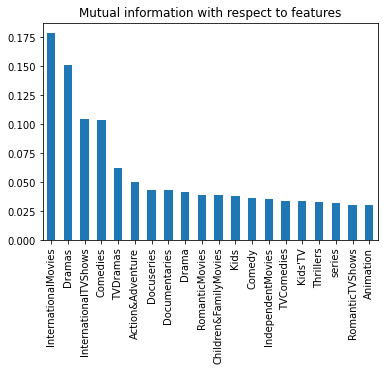

In [27]:
mi = pd.Series(mi)
mi.index = available_data_df.columns
mi.sort_values(ascending = False, inplace = True)

mi_top = mi[:20]

plt.title('Mutual information with respect to features')
mi_top.plot.bar()
plt.show()

<h4>Our Gain From Information Gain</h4>
//TODO

<h4>Goal Prediction and Models Optimization</h4>
Now, a decision tree-based model is implemented using scikit-learn library and optimized using its hyperparameters.<br>
1. Splitting the data<br>
    <li>First, we must split the data to two parts: train and test.<br>
    <li>This can be done using train_test_split.<br>
    
<br>
2. Prediction [8]<br>
    <li>Next, prediction is executed and measured using the accuracy value.<br>
    <li>For more elaborate evaluation, a confusion matrix will be shown.<br>

<br>
3. Optimization [9]<br>
    <li>Now, min_samples_split and max_depth hyperparameters are changed to optimize the model.
    

In [28]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

<h4>Decision Tree</h4>
Using the tree module in sklearn we can implement a decision tree model.<br>
Based on the documentation the model will be an instance of DecisionTreeRegressor with the following arguments:<br>
max_depth int, default=None<br>
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.<br>

min_samples_split int or float, default=2<br>
The minimum number of samples required to split an internal node:<br>

The min_samples_split parameter will evaluate the number of samples in the node, and if the number is less than the minimum the split will be avoided and the node will be a leaf.

In [29]:
#first, the features that don't have much gain and aren't helpful shoud be dropped:
for column in available_data_df.columns:
    if column not in mi[:50]:
        available_data_df.drop(columns=[column], axis=1)

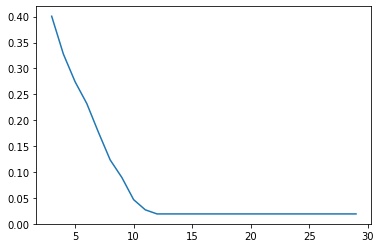

In [30]:
def predict(test_size, max_depth, min_samples_split):
    X_train, X_test, Y_train, Y_test = train_test_split(available_data_df, to_predit_df, test_size = test_size, random_state = 0)
    
    X_train.reset_index(inplace=True, drop=True)
    X_test.reset_index(inplace=True, drop=True)
    Y_train = Y_train.reset_index(drop=True)
    Y_test = Y_test.reset_index(drop=True)
    
    
    n = [i for i in range(3, max_depth)]
    err = [0]*(max_depth-3)

    for i in range(len(n)):
        decision_tree = tree.DecisionTreeClassifier(max_depth = n[i], min_samples_split = min_samples_split)
        decision_tree.fit(X_train, Y_train)
        predicted = pd.Series(decision_tree.predict(X_test))
        predicted = predicted.reset_index(drop=True)
        err[i] = mean_squared_error(predicted, Y_test, squared = False)

    plt.plot(n, err)
    plt.show()
    err[i]
    
predict(0.25, 30, 2)


1. Splitting:<br>
    The rate of splitting is .75 train to .25 test. This might be changed if the final accuracy increases:

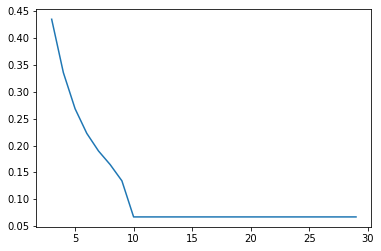

In [31]:
# Let's check the 98 to 2 rate
predict(0.02, 30, 2)

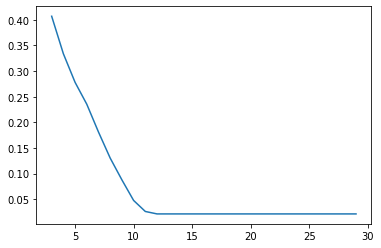

In [32]:
# Let's check the 60 to 40 rate
predict(0.4, 30, 2)

In our case, different ratios don't affect our results significantly, but in most cases, having too little test sample or too large test sample might be problematic.<br>
For the small test size, it might work well currently (or cause overfitting) but if we test it on other datasets, it will probably have lower accuracy than what we expected.<br>
For the large test size though, our model might have too little to work with and the learning procedure might not be complete causing our model to be under fitted.[12]<br>

<h4>GridSearchCV [9]</h4>
Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model.<br>


In [33]:
%%capture --no-stderr

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

X_train, X_test, Y_train, Y_test = train_test_split(available_data_df, to_predit_df, test_size = 0.25, random_state = 0)

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 13), 'min_samples_split':np.arange(1, 4)}

# decision tree model
dtree_model=tree.DecisionTreeClassifier()

#use gridsearch to test all values
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=5)

#fit model to data
grid_result  = dtree_gscv.fit(X_train, Y_train)

C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", l

In [34]:
grid_result

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
                         'min_samples_split': array([1, 2, 3])})

In [35]:
best_params = grid_result.best_params_
best_params

{'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 2}

Based on the above output, the best max_depth for our tree is 12 and with 2 min_samples_split.<br>
<h4>Why the greater max_depth isn't always good?</h4>
With too large max depth in our model we might encounter overfitting [11].<br>
In decision trees, over-fitting occurs when the tree is designed so as to perfectly fit all samples in the training data set. Thus it ends up with branches with strict rules of sparse data. Thus this effects the accuracy when predicting samples that are not part of the training set.<br>
In our case though, the ovefitting doesn't occur. This is partly because the features evaluated in the test dataset aren't unknown to our model and our model predicts the goal with high accuracy.<br>

Based on our optimization using grid search CV we'll eventually end up with the following:

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(available_data_df, to_predit_df, test_size = 0.25, random_state = 0)
    
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
Y_train = Y_train.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

decision_tree = tree.DecisionTreeClassifier(max_depth = best_params['max_depth'], min_samples_split = best_params['min_samples_split'])
decision_tree.fit(X_train, Y_train)
predicted = pd.Series(decision_tree.predict(X_test))
predicted = predicted.reset_index(drop=True)
err = mean_squared_error(predicted, Y_test, squared = False)

print("Accuracy is ", (1-err)*100, "%")

Accuracy is  97.31052550559447 %


<h4>Generating The Confusion Matrix [13]</h4>
In order to measure the performance of our model, we can use a confusion matrix.<br>
A confusion matrix is a technique for summarizing the performance of a classification algorithm.<br>
It gives us insight not only into the errors being made by the classifier but more importantly the types of errors that are being made.<br>


In [37]:
from sklearn.metrics import confusion_matrix
 
results = confusion_matrix(Y_test, predicted)
print(results)

[[1528    2]
 [   0 1235]]


Above is a confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class.[14]

<h4>Ensemble Methods for Machine Learning[15]</h4>
Ensemble methods is a machine learning technique that combines several base models in order to produce one optimal predictive model.<br>
Ensemble methods take a myriad of models into account, and average those models to produce one final model.<br>
In this poject, we'll be utilizing Random Forest models.<br>
Random Forest Models can be thought of as BAGGing[15], with a slight tweak. When deciding where to split and how to make decisions, BAGGed Decision Trees have the full disposal of features to choose from. Therefore, although the bootstrapped samples may be slightly different, the data is largely going to break off at the same features throughout each model. In contrary, Random Forest models decide where to split based on a <u>random selection of features</u>. Rather than splitting at similar features at each node throughout, Random Forest models implement a level of differentiation because each tree will split based on different features. This level of differentiation provides a greater ensemble to aggregate over, thus producing a more accurate predictor.

In [38]:
from sklearn import ensemble

def rand_forest_predict(max_depth, n_estimators, min_samples_split):
    X_train, X_test, Y_train, Y_test = train_test_split(available_data_df, to_predit_df, test_size = 0.25, random_state = 0)
    
    X_train.reset_index(inplace=True, drop=True)
    X_test.reset_index(inplace=True, drop=True)
    Y_train = Y_train.reset_index(drop=True)
    Y_test = Y_test.reset_index(drop=True)

    random_forest = ensemble.RandomForestClassifier(bootstrap = False, n_estimators = n_estimators, 
                                                max_samples = 8000, max_depth = max_depth, 
                                                min_samples_split = min_samples_split)
    random_forest.fit(X_train, Y_train)
    type_random_forest = pd.Series(random_forest.predict(X_test)).reset_index(drop=True)
    print('Accuracy is', (1-mean_squared_error(type_random_forest, Y_test, squared = False))*100, "%")
    print('n_estimators: {}\nmax_depth: {}\nmin_samples_split: {}'.format(n_estimators, max_depth, min_samples_split))
    return (1-mean_squared_error(type_random_forest, Y_test, squared = False))*100

The hyper parameters of Random Forest:<br>
<br>
<li> n_estimators: The number of trees in the forest.
<li> criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
<li> max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
<li> min_samples_split: The minimum number of samples required to split an internal node:
<li> bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

In [39]:
max_accuracy = 0
depths = []
estimators = []
samples_splits = []
accuracies = []
best_params = {'max_depth':0, 'n_estimators':0, 'min_samples_split':0}
for max_depth in range(6, 19, 6):
    for n_estimators in range(100, 201, 50):
        for min_samples_split in range(2,6):
            accuracy = rand_forest_predict(max_depth, n_estimators, min_samples_split)
            depths.append(max_depth)
            estimators.append(n_estimators)
            samples_splits.append(min_samples_split)
            accuracies.append(accuracy)
            if (accuracy > max_accuracy):
                max_accuracy = accuracy
                best_params['max_depth'] = max_depth
                best_params['n_estimators'] = n_estimators
                best_params['min_samples_split'] = min_samples_split
                

Accuracy is 92.39301738871036 %
n_estimators: 100
max_depth: 6
min_samples_split: 2
Accuracy is 93.69262322289859 %
n_estimators: 100
max_depth: 6
min_samples_split: 3
Accuracy is 94.29476304153278 %
n_estimators: 100
max_depth: 6
min_samples_split: 4
Accuracy is 93.41215981247669 %
n_estimators: 100
max_depth: 6
min_samples_split: 5
Accuracy is 97.31052550559447 %
n_estimators: 150
max_depth: 6
min_samples_split: 2
Accuracy is 95.74756744437438 %
n_estimators: 150
max_depth: 6
min_samples_split: 3
Accuracy is 93.41215981247669 %
n_estimators: 150
max_depth: 6
min_samples_split: 4
Accuracy is 95.341693530029 %
n_estimators: 150
max_depth: 6
min_samples_split: 5
Accuracy is 96.19650869435517 %
n_estimators: 200
max_depth: 6
min_samples_split: 2
Accuracy is 92.8843193303518 %
n_estimators: 200
max_depth: 6
min_samples_split: 3
Accuracy is 93.98615220675737 %
n_estimators: 200
max_depth: 6
min_samples_split: 4
Accuracy is 92.63457075789646 %
n_estimators: 200
max_depth: 6
min_samples_spli

In [40]:
best_params
# If bootstrap is True, the best param will be (18,200,4)

{'max_depth': 12, 'n_estimators': 200, 'min_samples_split': 4}

<h4>Plotting the results</h4>

In [1]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(222, projection='3d')

img = ax.trisurf(depths, estimators, samples_splits, c=accuracies, s=40, cmap=plt.cool())
ax.set_title("Random Forest Accuracy-HyperPrameters")
ax.set_xlabel("Max Depth")
ax.set_ylabel("N Estimators")
ax.set_zlabel("Min Samples Split")

fig.colorbar(img)
plt.show()

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

NameError: name 'plt' is not defined

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\WIN10\AppData\Local\Programs\Python\Python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

The results using the random forest aren't different from the single decision tree results.<br>
But a random forest has a higher variance and lower bias compared to a single decision tree. Each tree in a random forest will have a higher bias because it has a smaller dataset. A random forest will be a better model if the variance reduction overweights the bias increase of each tree.<br>

Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.<br>
Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before.<br>

If our model is too simple and has very few parameters then it may have high bias and low variance. On the other hand if our model has large number of parameters then it’s going to have high variance and low bias. So we need to find the right/good balance without overfitting and underfitting the data.

<b>References:<br></b>
[1] https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779<br>
[2] https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf<br>
[3] https://codefires.com/how-convert-categorical-data-numerical-data-python/<br>
[4] https://cmpoi.medium.com/a-quick-tutorial-to-encode-list-variables-125ba4040325<br>
[5] https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173<br>
[6] https://thepoints.medium.com/feature-extraction-from-text-using-countvectorizer-tfidfvectorizer-9f74f38f86cc<br>
[7] https://machinelearningmastery.com/information-gain-and-mutual-information/<br>
[8] https://www.aunalytics.com/decision-trees-an-overview/<br>
[9] https://medium.datadriveninvestor.com/an-introduction-to-grid-search-ff57adcc0998<br>
[10] https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/<br>
[11] https://www.researchgate.net/post/What_is_over_fitting_in_decision_tree<br>
[12] https://www.ibm.com/topics/underfitting<br>
[13] https://machinelearningmastery.com/confusion-matrix-machine-learning/<br>
[14] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html<br>
[15] https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f<br>
[16] https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229